In [1]:
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 26.8MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Acquiring Stock Data

In [2]:
import pandas_datareader as pdr
import pandas as pd
import datetime
sl = ['LUV', 'DAL', 'AAL', 'UAL', 'JBLU', 'ALK', 'SAVE']
cl = ['WN', 'DL', 'AA', 'UA', 'B6', 'AS', 'NK']

stock_data = pd.DataFrame()

for idx, symbol in enumerate(sl):
    new_stock_data = pdr.get_data_yahoo(symbol, start=datetime.datetime(2010,1,1), end=datetime.datetime(2019,12,1), interval='m')
    new_stock_data['symbol'] = symbol
    new_stock_data.index.name = 'Date'
    new_stock_data.reset_index(inplace=True)
    new_stock_data['year'] = pd.DatetimeIndex(new_stock_data['Date']).year
    new_stock_data['month'] = pd.DatetimeIndex(new_stock_data['Date']).month
    new_stock_data['carrier_id'] = cl[idx]
    stock_data = stock_data.append(new_stock_data)

file_name = 'monthly_stock_data_7_airlines.csv'
stock_data.to_csv(file_name)

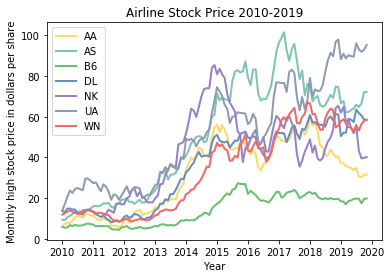

In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
AA = stock_data[stock_data['carrier_id'] =='AA']
AS = stock_data[stock_data['carrier_id'] =='AS']
B6 = stock_data[stock_data['carrier_id'] =='B6']
DL = stock_data[stock_data['carrier_id'] =='DL']
NK = stock_data[stock_data['carrier_id'] =='NK']
UA = stock_data[stock_data['carrier_id'] =='UA']
WN = stock_data[stock_data['carrier_id'] =='WN']

# Add a list of colors
colors = ['#6290C3', '#8C9CAF', '#FFD966', '#F36866', '#67BF70', '#7EC3B3', '#9581CA']

# multiple line plot
plt.plot('Date', 'High', data=AA, marker='', color=colors[2], linewidth=2, label='AA')
plt.plot('Date', 'High', data=AS, marker='', color=colors[5], linewidth=2, label='AS')
plt.plot('Date', 'High', data=B6, marker='', color=colors[4], linewidth=2, label='B6')
plt.plot('Date', 'High', data=DL, marker='', color=colors[0], linewidth=2, label='DL')
plt.plot('Date', 'High', data=NK, marker='', color=colors[6], linewidth=2, label='NK')
plt.plot('Date', 'High', data=UA, marker='', color=colors[1], linewidth=2, label='UA')
plt.plot('Date', 'High', data=WN, marker='', color=colors[3], linewidth=2, label='WN')
plt.title('Airline Stock Price 2010-2019')
plt.xlabel('Year')
plt.ylabel('Monthly high stock price in dollars per share')
plt.legend()


In [4]:
import matplotlib.pyplot as plt
carrier_counts_stock = stock_data.groupby('carrier_id')['year'].nunique()
print(carrier_counts_stock)

carrier_id
AA    10
AS    10
B6    10
DL    10
NK     9
UA    10
WN    10
Name: year, dtype: int64


# Cleaning up Fuel Cost data

In [5]:
import pandas_datareader as pdr
import pandas as pd
import datetime

import glob
import pandas as pd
import re

# instructions on using glob taken from:
# https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688

fuel_data = pd.DataFrame()
cl = ['WN', 'DL', 'AA', 'UA', 'B6', 'AS', 'NK']
for f in glob.glob('fuel_data/*'):
    year_df = pd.read_csv(f)
    year_df['year'] = re.findall("[0-9]{4}", f)[0]
    year_df = year_df[year_df['UNIQUE_CARRIER'].isin(cl)]
    year_df = year_df.drop(year_df.columns[4], axis=1)
    year_df = year_df.rename(columns={"UNIQUE_CARRIER": "carrier_id", "TOTAL_COST": "total_fuel_cost", "CARRIER_NAME":'carrier_name', "MONTH": 'month'})
    fuel_data = fuel_data.append(year_df, ignore_index = True)
    
file_name_fuel = 'monthly_fuel_data_7_airlines.csv'
fuel_data = fuel_data.sort_values(by=['year', 'month', 'carrier_id'])
fuel_data.to_csv(file_name_fuel)

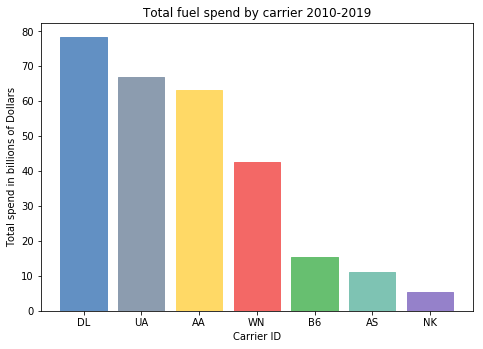

In [6]:
import matplotlib.pyplot as plt
colors = ['#6290C3', '#8C9CAF', '#FFD966', '#F36866', '#67BF70', '#7EC3B3', '#9581CA']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sum_data = ((fuel_data.groupby(['carrier_id'])['total_fuel_cost'].sum()) / 1000000000).sort_values(ascending=False)
bars = ax.bar(sum_data.index, sum_data.values)
for idx, bar in enumerate(bars):
    bar.set_color(colors[idx % 7])
plt.title('Total fuel spend by carrier 2010-2019')
plt.xlabel('Carrier ID')
plt.ylabel('Total spend in billions of Dollars')

plt.show()

In [7]:
import matplotlib.pyplot as plt
carrier_counts = fuel_data.groupby('carrier_id')['year'].nunique()
print(carrier_counts)

carrier_id
AA    10
AS    10
B6    10
DL    10
NK    10
UA    10
WN    10
Name: year, dtype: int64


# Aggregating flight data

In [8]:
import pandas_datareader as pdr
import pandas as pd
import datetime

import glob
import pandas as pd
import re

# instructions on using glob taken from:
# https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688

flight_data = pd.DataFrame()
cl = ['WN', 'DL', 'AA', 'UA', 'B6', 'AS', 'NK']
for f in glob.glob('flight_data/*'):
    year_df_flight = pd.read_csv(f)
    # Not needed, 'year' column already exists
    # year_df_flight['year'] = re.findall("[0-9]{4}", f)[0]
    # Renaming columns to lowercase 
    year_df_flight = year_df_flight.rename(str.lower, axis='columns')
    # Remove an empty column
    year_df_flight = year_df_flight.drop(year_df_flight.columns[20], axis=1)
    year_df_flight = year_df_flight[year_df_flight['unique_carrier'].isin(cl)]
    flight_data = flight_data.append(year_df_flight, ignore_index = True)

# Add a 'yearmonth' column that is needed later
flight_data['yearmonth'] = flight_data['year'].astype(str) + '-' +flight_data['month'].map("{:02}".format)
file_name_flight = 'monthly_flight_data_7_airlines.csv'
flight_data = flight_data.sort_values(by=['year', 'month', 'unique_carrier'])
flight_data.to_csv(file_name_flight)

In [9]:
flight_data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,unique_carrier_name,origin_airport_id,origin,dest_airport_id,dest,aircraft_type,year,quarter,month,yearmonth
236695,0.0,1.0,38800.0,140.0,138.0,0.0,0.0,722.0,140.0,122.0,...,American Airlines Inc.,11298,DFW,13502,MTJ,655,2010,1,1,2010-01
239241,0.0,1.0,50100.0,188.0,155.0,0.0,0.0,852.0,146.0,116.0,...,American Airlines Inc.,13487,MSP,11298,DFW,622,2010,1,1,2010-01
243058,0.0,1.0,39900.0,148.0,106.0,0.0,0.0,235.0,92.0,47.0,...,American Airlines Inc.,11433,DTW,13930,ORD,614,2010,1,1,2010-01
245390,0.0,1.0,50100.0,188.0,169.0,0.0,0.0,479.0,75.0,63.0,...,American Airlines Inc.,13495,MSY,11953,GNV,622,2010,1,1,2010-01
246478,0.0,1.0,38400.0,148.0,138.0,0.0,0.0,722.0,117.0,93.0,...,American Airlines Inc.,13502,MTJ,11298,DFW,655,2010,1,1,2010-01


In [10]:
flight_data.shape

(1102071, 21)

In [11]:
rollup_data = flight_data.groupby(
    ['unique_carrier', 'yearmonth']
).agg(
    {
        'departures_scheduled': sum,
        'departures_performed': sum,
        'seats': sum,
        'passengers': sum,
        'distance': sum,
        'ramp_to_ramp': sum,
        'air_time': sum
    }
)

In [12]:
rollup_data.columns

Index(['departures_scheduled', 'departures_performed', 'seats', 'passengers',
       'distance', 'ramp_to_ramp', 'air_time'],
      dtype='object')

In [13]:
rollup_data.to_csv('monthly_flight_data_summary_7_airlines.csv')

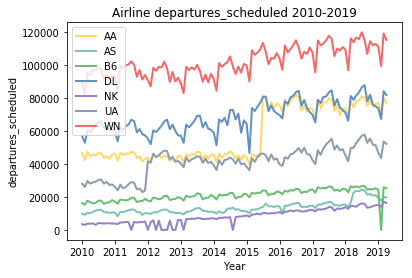

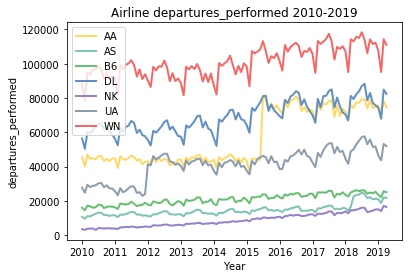

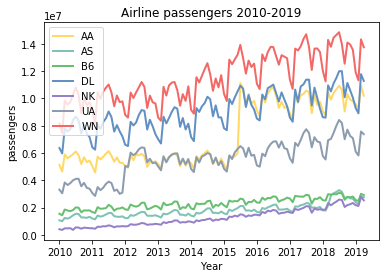

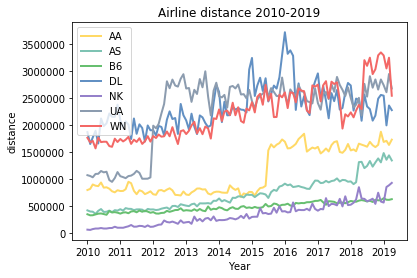

In [14]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

airline_stats = pd.read_csv('monthly_flight_data_summary_7_airlines.csv')
stats = ["departures_scheduled", "departures_performed", "passengers", "distance"]
 
# Data
AA = airline_stats[airline_stats['unique_carrier'] =='AA']
AS = airline_stats[airline_stats['unique_carrier'] =='AS']
B6 = airline_stats[airline_stats['unique_carrier'] =='B6']
DL = airline_stats[airline_stats['unique_carrier'] =='DL']
NK = airline_stats[airline_stats['unique_carrier'] =='NK']
UA = airline_stats[airline_stats['unique_carrier'] =='UA']
WN = airline_stats[airline_stats['unique_carrier'] =='WN']

for stat in stats:
    # multiple line plot
    plot = plt.figure()
    plt.plot(pd.to_datetime(AA['yearmonth']), stat, data=AA, marker='', color=colors[2], linewidth=2, label='AA')
    plt.plot(pd.to_datetime(AS['yearmonth']), stat, data=AS, marker='', color=colors[5], linewidth=2, label='AS')
    plt.plot(pd.to_datetime(B6['yearmonth']), stat, data=B6, marker='', color=colors[4], linewidth=2, label='B6')
    plt.plot(pd.to_datetime(DL['yearmonth']), stat, data=DL, marker='', color=colors[0], linewidth=2, label='DL')
    plt.plot(pd.to_datetime(NK['yearmonth']), stat, data=NK, marker='', color=colors[6], linewidth=2, label='NK')
    plt.plot(pd.to_datetime(UA['yearmonth']), stat, data=UA, marker='', color=colors[1], linewidth=2, label='UA')
    plt.plot(pd.to_datetime(WN['yearmonth']), stat, data=WN, marker='', color=colors[3], linewidth=2, label='WN')
    plt.title('Airline ' + stat + ' 2010-2019')
    plt.xlabel('Year')
    plt.ylabel(stat)
    plt.legend()
    plot.show()